In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/Polygence/Audrey/"

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import datetime

In [0]:
names = ["Warren", "Biden", "Sanders", "Buttigieg", "Harris", "Yang", "Klobuchar"]
month_mapper = {
    7: "jul",
    8: "aug",
    10: "oct",
    11: "nov",
    12: "dec",
    1: "jan"
}

In [9]:
polls = pd.read_csv(root_dir + "/data/president_primary_polls.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
polls

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,116814,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546.0,AtlasIntel,NaN,431,lv,lv-d,Online,U.S. President,2/8/20,2/10/20,NaN,False,NaN,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Buttigieg,13345,Pete Buttigieg,24.0
1,116814,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546.0,AtlasIntel,NaN,431,lv,lv-d,Online,U.S. President,2/8/20,2/10/20,NaN,False,NaN,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,24.0
2,116814,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546.0,AtlasIntel,NaN,431,lv,lv-d,Online,U.S. President,2/8/20,2/10/20,NaN,False,NaN,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Klobuchar,13310,Amy Klobuchar,14.0
3,116814,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546.0,AtlasIntel,NaN,431,lv,lv-d,Online,U.S. President,2/8/20,2/10/20,NaN,False,NaN,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,12.0
4,116814,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546.0,AtlasIntel,NaN,431,lv,lv-d,Online,U.S. President,2/8/20,2/10/20,NaN,False,NaN,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Warren,13258,Elizabeth Warren,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
16699,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0
16700,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0
16701,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0


In [0]:
polls["month"] = polls["end_date"].apply(lambda x: x.split("/")[0]).astype(int)
polls["year"] = polls["end_date"].apply(lambda x: x.split("/")[2]).astype(int)
polls["day"] = polls["end_date"].apply(lambda x: x.split("/")[1]).astype(int)
polls = polls[polls["year"].isin([19, 20])]
polls = polls[~((polls["month"]== 1) & (polls["year"] == 19))]
polls["month_name"] = polls["month"].map(month_mapper)
polls = polls[~(polls["month_name"].isnull())]

In [0]:
polls = polls[polls["party"] == "DEM"]

In [16]:
polls

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,month,year,day,month_name
517,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Bennet,13352,Michael F. Bennet,0.0,1,20,31,jan
518,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,22.0,1,20,31,jan
519,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Buttigieg,13345,Pete Buttigieg,12.0,1,20,31,jan
520,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Delaney,13314,John K. Delaney,0.0,1,20,31,jan
521,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Gabbard,13343,Tulsi Gabbard,5.0,1,20,31,jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11832,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Gravel,13359,Mike Gravel,0.0,7,19,1,jul
11833,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Bullock,13320,Steve Bullock,0.0,7,19,1,jul
11834,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Moulton,13322,Seth Moulton,0.0,7,19,1,jul
11835,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Messam,13357,Wayne Messam,0.0,7,19,1,jul


In [0]:
def get_week(row):
  return datetime.date(2000 + row["year"], row["month"], row["day"]).isocalendar()[1]
polls["week"] = polls.apply(get_week, axis=1)

In [18]:
polls

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,month,year,day,month_name,week
517,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Bennet,13352,Michael F. Bennet,0.0,1,20,31,jan,5
518,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,22.0,1,20,31,jan,5
519,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Buttigieg,13345,Pete Buttigieg,12.0,1,20,31,jan,5
520,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Delaney,13314,John K. Delaney,0.0,1,20,31,jan,5
521,116510,63430,2020,New Hampshire,1234,University of Massachusetts Lowell,NaN,NaN,University of Massachusetts Lowell,355.0,University of Massachusetts Lowell,A/B,400,lv,lv-d,Online,U.S. President,1/28/20,1/31/20,NaN,False,NaN,False,False,2/3/20 06:01,NaN,https://www.uml.edu/docs/TOPLINE%20-%20UMass%2...,primary,DEM,Gabbard,13343,Tulsi Gabbard,5.0,1,20,31,jan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11832,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Gravel,13359,Mike Gravel,0.0,7,19,1,jul,27
11833,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Bullock,13320,Steve Bullock,0.0,7,19,1,jul,27
11834,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Moulton,13322,Seth Moulton,0.0,7,19,1,jul,27
11835,99047,58609,2020,NaN,1365,Change Research,NaN,NaN,Change Research,48.0,Change Research,C,1185,lv,lv-d,Online,U.S. President,6/28/19,7/1/19,NaN,False,NaN,False,False,7/3/19 11:07,NaN,https://www.changeresearch.com/post-debate-pol...,primary,DEM,Messam,13357,Wayne Messam,0.0,7,19,1,jul,27


In [0]:
polls_df = []
for (month, name), g in polls.groupby(["week", "answer"]):
  if name not in names:
    continue
  polls_df.append({"week": month, "candidate": name, "popularity": g["pct"].mean()})
polls_df = pd.DataFrame(polls_df)

In [0]:
polls_df.to_csv(root_dir + "/data/candidate_popularity_week.csv", index=False)

In [21]:
polls_df

,week,candidate,popularity
0,1,Biden,28.20
1,1,Buttigieg,12.64
2,1,Klobuchar,5.25
3,1,Sanders,22.26
4,1,Warren,16.76
...,...,...,...
177,52,Buttigieg,7.00
178,52,Klobuchar,2.80
179,52,Sanders,18.00
180,52,Warren,15.20


In [0]:
month_order = ["jul","aug", "oct", "nov", "dec", "jan"]

In [0]:
polls_df['month'] = pd.Categorical(polls_df['month'],categories=["jul","aug", "oct", "nov", "dec", "jan"],ordered=True)


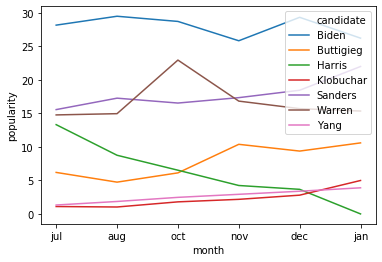

In [0]:
sns.lineplot(data=polls_df, x="month", y="popularity", hue="candidate", sort=False)